## Name : Hania Rasheed
## Lab : 08
### Initial Steps
- Import Libraries
- Load data set in a data frame named bird

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bird = sns.load_dataset("penguins")
bird

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#### Task 1.	What insights about penguin gender distribution, body mass, and flipper length can be obtained from the visualization generated with just five lines of code, and what distinguishes each gender in terms of their presence on different islands? (Use mapping method)
Using FacetGrid from seaborn we create a graph that shows insights about penguin gender, body mass and flipper length. The insighnts are:
- Females have a comparitively smaller flipper length and lesser body mass
- We also see that Biscoe island has the largest population than all three islands, Torgersen, Biscoe and Dream
- From the scatter plot we see that if the flipper length increases, bosy mass also increases

The parameter **hue** distinguishes each gender in terms of their presence on different islands, it also helps to put legends. It helps to distinguish using different colours. The code FacetGrid() contains col as islands and hue as species.
A FaceGrid is a multi-axes grid with subplots visualizing the distribution of variables of a dataset and the relationship between multiple variables.

C:\Users\hania\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


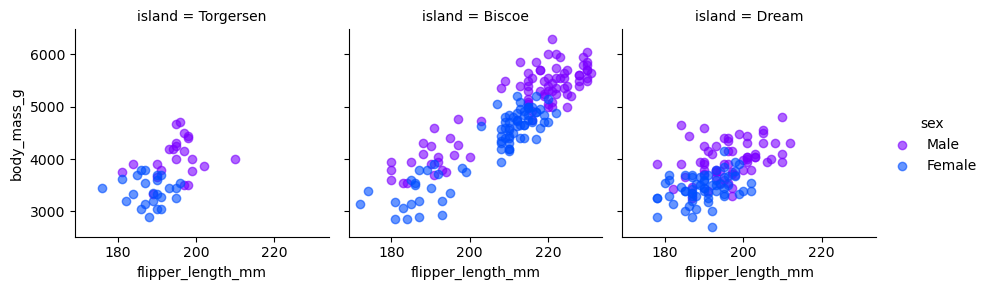

In [43]:
g = sns.FacetGrid(bird,col="island",hue="sex")
g.map(plt.scatter, "flipper_length_mm","body_mass_g",alpha=.6)
g.add_legend()
plt.show()

#### Task 2.	How can a strip plot be utilized to efficiently visualize both the range of penguin bill lengths across gender and islands, as well as the concentration of bill lengths within each gender for individual islands?
A strip plot is a single-axis scatter plot that is used to visualise the distribution of many individual one-dimensional values. The values are plotted as dots along one unique axis, and the dots with the same value can overlap.

By putting island on x axis, bill length on y axis and setting hue as sex to distinguish species based on colors, we can efficiently visualize both range of penguin bill lengths accross gender and islands. The cluster shows the concentration of bill lengths within each gender for individual islands. 

Insights from this graph are:
- In all three islands, the male penguins have a longer bill compared to female penguins
- As Biscoe island has more population of penguins, it has more data points, and a larger range of bill length

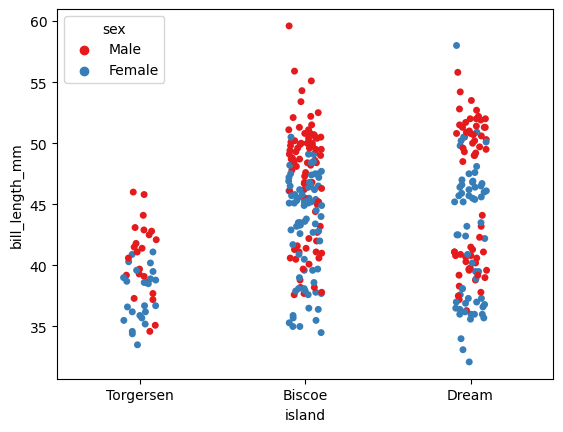

In [27]:
sns.stripplot(x="island",y="bill_length_mm",hue = "sex",data=bird,palette="Set1")
plt.show()

#### Task 3.	How does the utilization of a swarm plot enhance the understanding of densely populated data, and what insights can be drawn regarding the flipper’s length ranges of different penguin genders, particularly Adelie, Gentoo, and Chinstrap?
Swarmplot is used to visualize categorical data with numerical values. A swarmplot displays each data point as a point on a graph, with points representing values of the categorical variable and their positions representing the corresponding numerical values

In a densely populated data, swarm plot enhances the utilization of understanding. This is mainly done by one of its parameters **dodge** which makes the data easy to understand.
When using hue nesting, setting dodge should be True will separate the point for different hue levels along the categorical axis. And Palette is used for the different levels of the hue variable.

Insights:
- In all 3 species, male penguins have a larger bill length compared to female penguins
- In Gentoo specie, both male and female have large bill length compared to other species
- Chinstrap specie has the smallest number of population, but an average flipper length

<Axes: xlabel='species', ylabel='flipper_length_mm'>

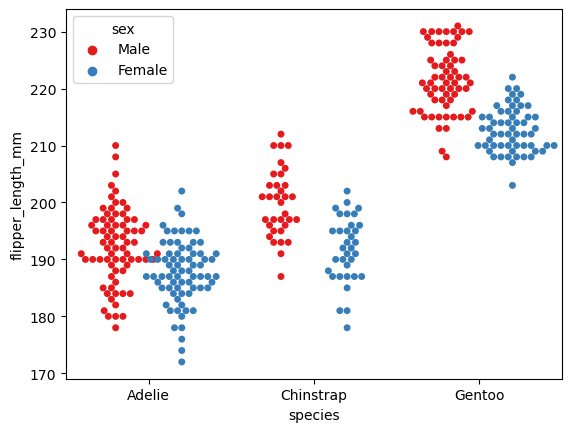

In [30]:
sns.swarmplot(x="species",y="flipper_length_mm",hue="sex",data=bird,palette="Set1",dodge =True)

#### Task 4.	Is the link between body mass and bill depth of the penguins on Dream Island direct or inverse? (Use Lmplot)
lmplots are basically scatter plots with overlaid regression lines.
To make a plot, first we'll extract data of dream island from islands in data frame bird. 
The context is related to a bar graph comparing the body mass index (BMI) of males and females.
Insights:
- There is an inverse relationship between bill depth and body mass for the two species residing in Dream Island. This is because there lines intersect at a point


C:\Users\hania\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


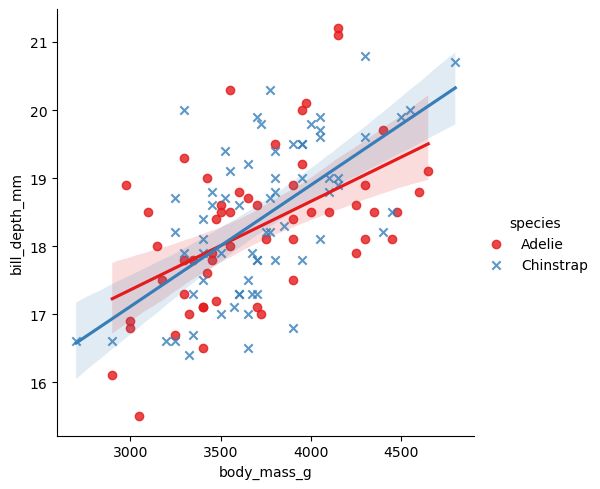

In [35]:
dream = bird[bird["island"]=="Dream"]
sns.lmplot(x="body_mass_g",y="bill_depth_mm",hue="species",markers=["o","x"],palette="Set1",data=dream)
plt.show()

If we make a lmplot with order 2, we get the following two figures. This shows relationship of body mass and flipper length along different genders of species living in Dream island. It is evident that its also inverse, as there is a possibility of intersection

C:\Users\hania\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


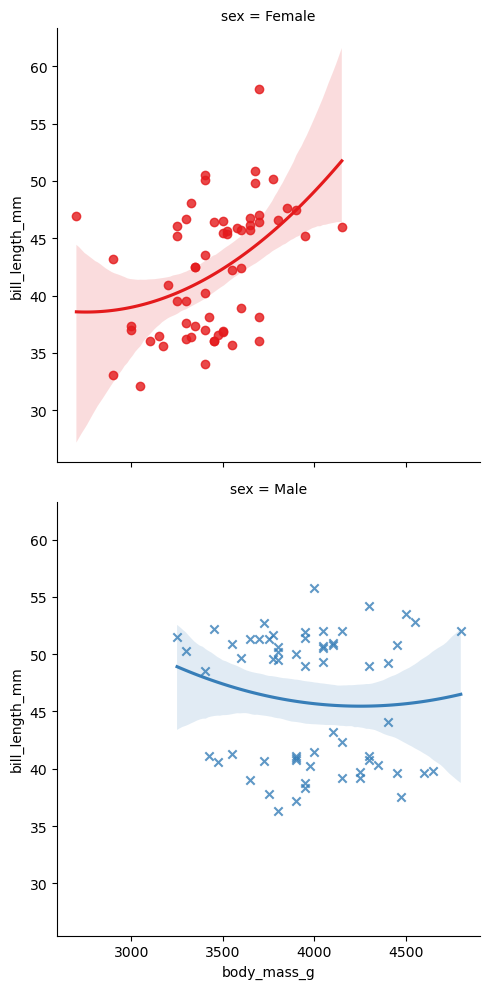

In [42]:
sns.lmplot(x="body_mass_g", y="bill_length_mm", hue="sex",row="sex",order=2, markers=["o", "x"],palette="Set1",data=dream)
plt.show()

#### Task 5.	How does the specified joint plot, utilizing a hexbin representation, facilitate the visualization of the relationship between body flipper length and bill length in the penguin dataset "bird,"?
A Jointplot is a figure that showcases the relationship between two variables, combining scatter plots, hexbin plots, regression plots, or 2D kernel density plots with histograms, KDE (Kernel Density Estimate) plots, or other representations of the univariate distribution of each variable on the margins.
Using a joint plot we can easilt check for 
- frequency of bill length on y_axis
- frequency of flipper length on x_axis
- The point where these two variables meet (hex bin)
- If more data points coincide closer, they form a cluster and the intensity of that hex bin is more and can be seen as black
- Lesser Intensity leads to lighter hex bins

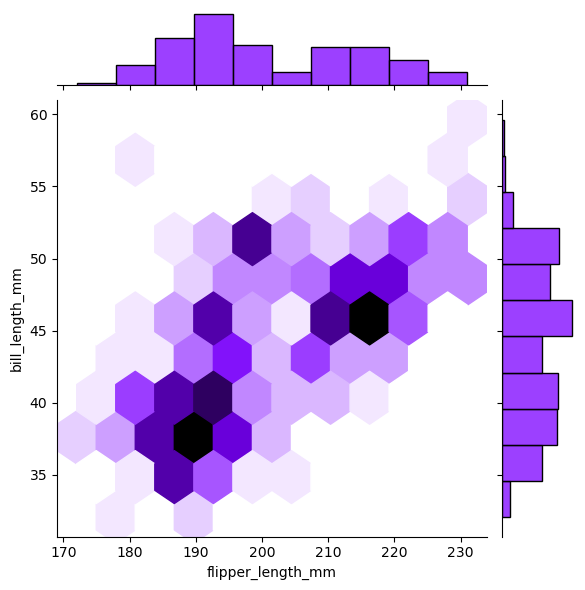

In [39]:
sns.set_palette("gist_rainbow_r")
sns.jointplot(x="flipper_length_mm",y="bill_length_mm",kind="hex",data=bird)

We can make our joint plot even more easy to understand by denoting data points as +, this helps us see exactly where individual data points are.

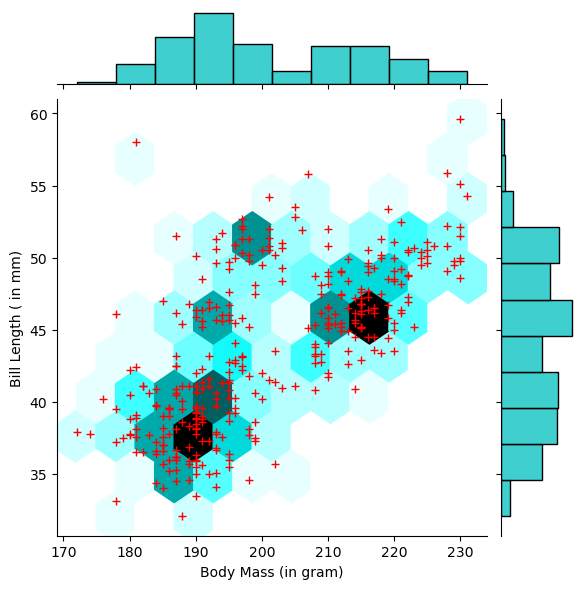

In [40]:
g = sns.jointplot(x="flipper_length_mm", y="bill_length_mm", data=bird, kind="hex", color="c")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
g.set_axis_labels("Body Mass (in gram)", "Bill Length ( in mm)")
plt.show()